In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import plotly.express as px
import plotly.graph_objects as go
import matplotlib.dates as mdates
import scipy.stats
from sklearn.metrics import mean_absolute_error, mean_squared_error
import pylab
sns.set(style='white')

from statsmodels.tsa.stattools import adfuller
import statsmodels.api as sm
from statsmodels.tsa.seasonal import seasonal_decompose
import warnings
warnings.filterwarnings('ignore')
from statsmodels.tsa.arima.model import ARIMA
from   statsmodels.tsa.api import ExponentialSmoothing, SimpleExpSmoothing, Holt
from   IPython.display import display
from   pylab import rcParams


In [ ]:
df = pd.read_csv('NIFTY50_all.csv')
df.head()

,Date,Symbol,Series,Prev Close,Open,High,Low,Last,Close,VWAP,Volume,Turnover,Trades,Deliverable Volume,%Deliverble
0,2007-11-27,MUNDRAPORT,EQ,440.00,770.00,1050.00,770.0,959.0,962.90,984.72,27294366,2.687719e+15,NaN,9859619.0,0.3612
1,2007-11-28,MUNDRAPORT,EQ,962.90,984.00,990.00,874.0,885.0,893.90,941.38,4581338,4.312765e+14,NaN,1453278.0,0.3172
2,2007-11-29,MUNDRAPORT,EQ,893.90,909.00,914.75,841.0,887.0,884.20,888.09,5124121,4.550658e+14,NaN,1069678.0,0.2088
3,2007-11-30,MUNDRAPORT,EQ,884.20,890.00,958.00,890.0,929.0,921.55,929.17,4609762,4.283257e+14,NaN,1260913.0,0.2735
4,2007-12-03,MUNDRAPORT,EQ,921.55,939.75,995.00,922.0,980.0,969.30,965.65,2977470,2.875200e+14,NaN,816123.0,0.2741


In [ ]:
df.shape

(235192, 15)

In [ ]:
df.dtypes

Date                   object
Symbol                 object
Series                 object
Prev Close            float64
Open                  float64
High                  float64
Low                   float64
Last                  float64
Close                 float64
VWAP                  float64
Volume                  int64
Turnover              float64
Trades                float64
Deliverable Volume    float64
%Deliverble           float64
dtype: object

In [ ]:
df['Symbol'].unique()

array(['MUNDRAPORT', 'ADANIPORTS', 'ASIANPAINT', 'UTIBANK', 'AXISBANK',
       'BAJAJ-AUTO', 'BAJAJFINSV', 'BAJAUTOFIN', 'BAJFINANCE', 'BHARTI',
       'BHARTIARTL', 'BPCL', 'BRITANNIA', 'CIPLA', 'COALINDIA', 'DRREDDY',
       'EICHERMOT', 'GAIL', 'GRASIM', 'HCLTECH', 'HDFC', 'HDFCBANK',
       'HEROHONDA', 'HEROMOTOCO', 'HINDALC0', 'HINDALCO', 'HINDLEVER',
       'HINDUNILVR', 'ICICIBANK', 'INDUSINDBK', 'INFOSYSTCH', 'INFY',
       'IOC', 'ITC', 'JSWSTL', 'JSWSTEEL', 'KOTAKMAH', 'KOTAKBANK', 'LT',
       'M&M', 'MARUTI', 'NESTLEIND', 'NTPC', 'ONGC', 'POWERGRID',
       'RELIANCE', 'SBIN', 'SHREECEM', 'SUNPHARMA', 'TELCO', 'TATAMOTORS',
       'TISCO', 'TATASTEEL', 'TCS', 'TECHM', 'TITAN', 'ULTRACEMCO',
       'UNIPHOS', 'UPL', 'SESAGOA', 'SSLT', 'VEDL', 'WIPRO', 'ZEETELE',
       'ZEEL'], dtype=object)

In [ ]:
df.describe()

,Prev Close,Open,High,Low,Last,Close,VWAP,Volume,Turnover,Trades,Deliverable Volume,%Deliverble
count,235192.000000,235192.000000,235192.000000,235192.000000,235192.000000,235192.000000,235192.00000,2.351920e+05,2.351920e+05,1.203440e+05,2.191150e+05,219115.000000
mean,1266.196349,1267.759708,1286.581440,1247.488465,1266.388302,1266.554351,1267.13230,3.045903e+06,1.610138e+14,6.196427e+04,1.315098e+06,0.502997
std,2581.370320,2585.259609,2619.649216,2546.621396,2581.392543,2582.140942,2582.69998,7.333981e+06,3.298085e+14,6.866457e+04,2.831670e+06,0.190019
min,0.000000,8.500000,9.750000,8.500000,9.100000,9.150000,9.21000,3.000000e+00,1.047000e+07,1.100000e+01,5.000000e+00,0.023600
25%,274.300000,275.000000,279.500000,269.600000,274.400000,274.350000,274.69750,2.190095e+05,1.612816e+13,2.183400e+04,1.253830e+05,0.364700
50%,566.500000,567.025000,576.900000,556.500000,567.000000,566.700000,566.94000,1.010938e+06,6.832603e+13,4.406800e+04,5.017560e+05,0.511000
75%,1242.200000,1243.312500,1263.000000,1221.650000,1242.900000,1242.400000,1242.66250,3.019851e+06,1.863835e+14,7.893550e+04,1.452233e+06,0.638400
max,32861.950000,33399.950000,33480.000000,32468.100000,32849.000000,32861.950000,32975.24000,4.810589e+08,3.564334e+16,1.643015e+06,2.325307e+08,1.000000


#There are many outliers in our dataset as we can see the max is 3 times the 75th percentile
#The standard deviation and other statistical measurements is more or less equal among all the features.

In [ ]:
stock_name = input('Enter NSE Stock Name: ').upper()
data = df[df['Symbol']==stock_name]
data.set_index('Date')

Enter NSE Stock Name: Reliance


,Symbol,Series,Prev Close,Open,High,Low,Last,Close,VWAP,Volume,Turnover,Trades,Deliverable Volume,%Deliverble
Date,,,,,,,,,,,,,,
2000-01-03,RELIANCE,EQ,233.05,237.50,251.70,237.50,251.70,251.70,249.37,4456424,1.111319e+14,NaN,NaN,NaN
2000-01-04,RELIANCE,EQ,251.70,258.40,271.85,251.30,271.85,271.85,263.52,9487878,2.500222e+14,NaN,NaN,NaN
2000-01-05,RELIANCE,EQ,271.85,256.65,287.90,256.65,286.75,282.50,274.79,26833684,7.373697e+14,NaN,NaN,NaN
2000-01-06,RELIANCE,EQ,282.50,289.00,300.70,289.00,293.50,294.35,295.45,15682286,4.633254e+14,NaN,NaN,NaN
2000-01-07,RELIANCE,EQ,294.35,295.00,317.90,293.00,314.50,314.55,308.91,19870977,6.138388e+14,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-04-26,RELIANCE,EQ,1904.35,1920.00,1962.00,1911.50,1938.00,1937.85,1941.32,9620785,1.867699e+15,259137.0,4276703.0,0.4445
2021-04-27,RELIANCE,EQ,1937.85,1940.00,1997.20,1938.25,1990.00,1988.65,1978.64,9226547,1.825602e+15,291197.0,3772144.0,0.4088
2021-04-28,RELIANCE,EQ,1988.65,1997.85,2008.00,1980.15,1993.15,1997.30,1997.60,7902002,1.578508e+15,247331.0,3921560.0,0.4963


In [ ]:
data.isnull().sum()

Date                     0
Symbol                   0
Series                   0
Prev Close               0
Open                     0
High                     0
Low                      0
Last                     0
Close                    0
VWAP                     0
Volume                   0
Turnover                 0
Trades                2850
Deliverable Volume     514
%Deliverble            514
dtype: int64

In [ ]:
columns = data[['Prev Close', 'Open', 'High', 'Low', 'Last','Close', 'VWAP']]
columns 

,Prev Close,Open,High,Low,Last,Close,VWAP
166253,233.05,237.50,251.70,237.50,251.70,251.70,249.37
166254,251.70,258.40,271.85,251.30,271.85,271.85,263.52
166255,271.85,256.65,287.90,256.65,286.75,282.50,274.79
166256,282.50,289.00,300.70,289.00,293.50,294.35,295.45
166257,294.35,295.00,317.90,293.00,314.50,314.55,308.91
...,...,...,...,...,...,...,...
171554,1904.35,1920.00,1962.00,1911.50,1938.00,1937.85,1941.32
171555,1937.85,1940.00,1997.20,1938.25,1990.00,1988.65,1978.64
171556,1988.65,1997.85,2008.00,1980.15,1993.15,1997.30,1997.60
171557,1997.30,2022.90,2044.50,2007.30,2020.00,2024.05,2024.21


In [ ]:
columns = data[['Prev Close', 'Open', 'High', 'Low', 'Last','Close', 'VWAP']]

<Axes: >

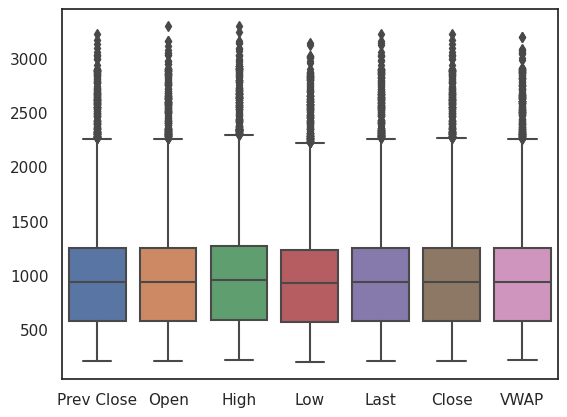

In [ ]:
sns.boxplot(columns)

<Axes: >

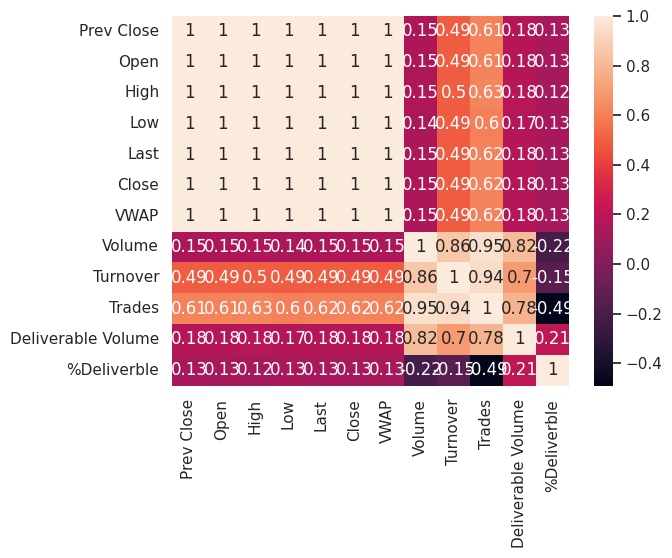

In [ ]:
sns.heatmap(data.corr(),annot=True)

From the above heatmap, you can see a large number of 1s and values close to 1. 
This means those variables show high positive correlations and are interrelated. 
This might be possible because of the comparatively very small difference between those values. 
However, in-stock market this small value is what makes the difference.

In [ ]:
data.fillna(data.bfill(),inplace=True)
data.isnull().sum()

Date                  0
Symbol                0
Series                0
Prev Close            0
Open                  0
High                  0
Low                   0
Last                  0
Close                 0
VWAP                  0
Volume                0
Turnover              0
Trades                0
Deliverable Volume    0
%Deliverble           0
dtype: int64

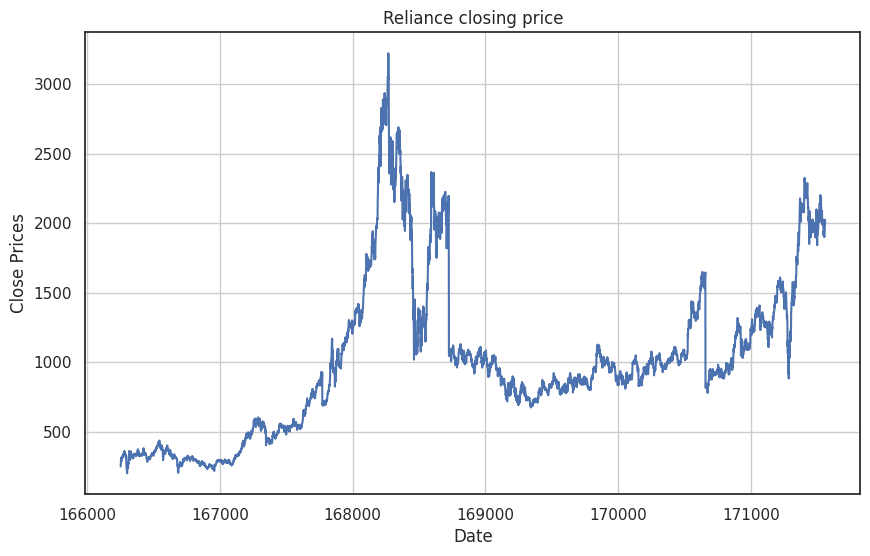

In [ ]:
#plot close price
plt.figure(figsize=(10,6))
plt.grid(True)
plt.xlabel('Date')
plt.ylabel('Close Prices')
plt.plot(data['Close'])
plt.title('Reliance closing price')
plt.show()

In [ ]:
columns = data[['Prev Close', 'Open', 'High', 'Low', 'Last','Close', 'VWAP']]

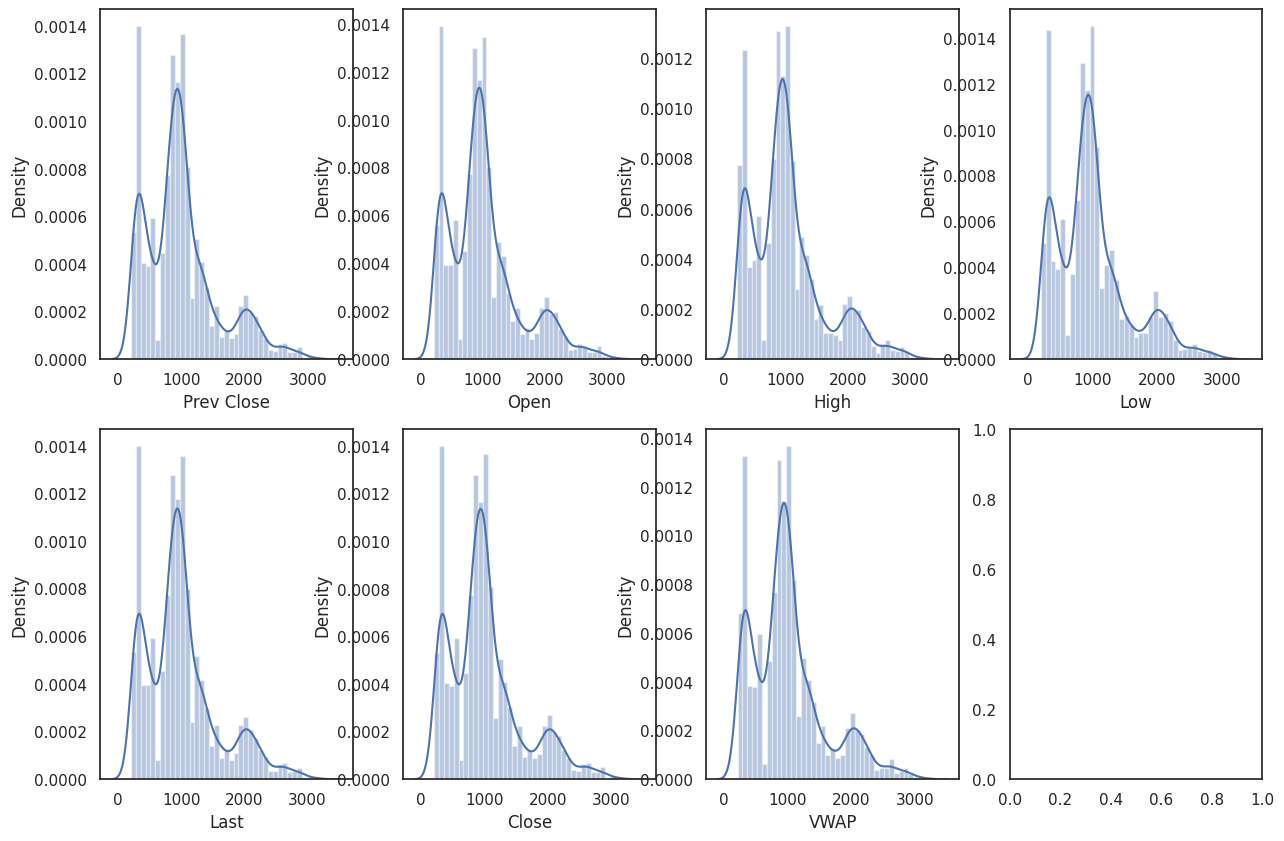

In [ ]:
fig,ax = plt.subplots(2,4,figsize=(15,10))
for i,c in zip(columns.columns,ax.flatten()):
    sns.distplot(columns[i],ax=c)

In [ ]:
#All the meaures exhibit equal distribution property
#All the distributions are right skewed

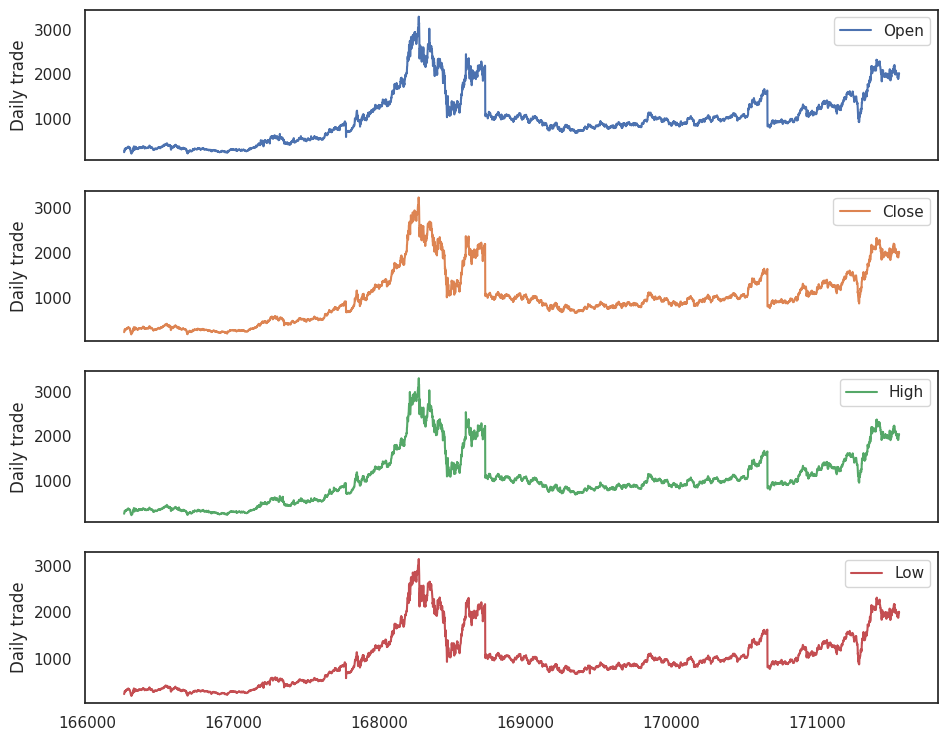

In [ ]:
cols_plot = ['Open', 'Close', 'High','Low']
axes = data[cols_plot].plot(figsize=(11, 9), subplots=True)
for ax in axes:
    ax.set_ylabel('Daily trade')

In [ ]:
#As we know, all these parameters follow the same pattern without much deviation
#Theres a break,It signifies a sudden dip in the market for Reliance.

<Axes: ylabel='Density'>

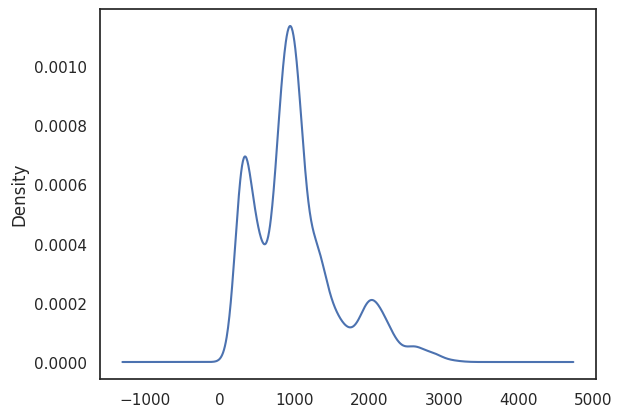

In [ ]:
df_close = data['Close']
df_close.plot(kind='kde')


In [ ]:
fig = go.Figure()
fig.add_trace(go.Scatter(
         x=data['Date'],
         y=data['Open'],
         name='Open',
    line=dict(color='blue'),
    opacity=0.8))

fig.add_trace(go.Scatter(
         x=data['Date'],
         y=data['Close'],
         name='Close',
    line=dict(color='red'),
    opacity=0.8))
        
    
fig.update_layout(title_text='Open Vs Close',plot_bgcolor='rgb(248, 248, 255)',yaxis_title='Value')

fig.show()

we can clearly see most of the time the open is higher than close.
But the difference is very subtle. If we take moving average, we might not even notice the difference.
There’s one place where you can notice a big difference is on May,2008 where the opening starts with 3026 and closes at 2674.5



In [ ]:
fig = go.Figure()
fig.add_trace(go.Scatter(
         x=data['Date'],
         y=data['High'],
         name='High',
    line = dict(color='green', width=4),
    opacity=0.8))

fig.add_trace(go.Scatter(
         x=data['Date'],
         y=data['Low'],
         name='Low',
    line=dict(color='blue', width=4),
    opacity=0.8))
        
    
fig.update_layout(title_text='High Vs Low',plot_bgcolor='rgb(248, 248, 255)',yaxis_title='Value')

fig.show()

High vs Low follows the same path as Open vs Low, where High is a little higher than Low price of the day.
If you see at November 25 and 26 2009, The lowest price hit on 25th 2169 and on 26th the high price recorded was 1111, which shows the huge dip

In [ ]:
data['Date']=data['Date'].astype('datetime64[ns]')

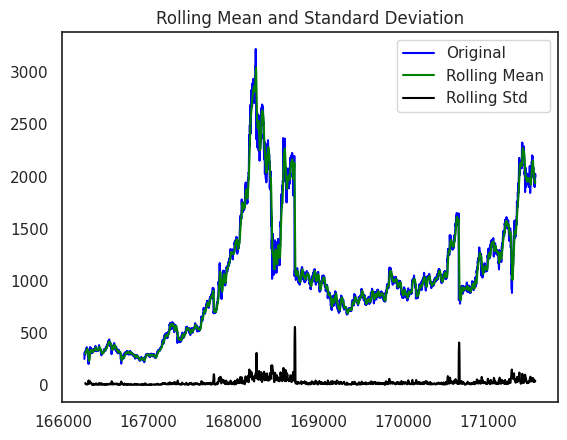

Results of dickey fuller test
Test Statistics                  -1.849052
p-value                           0.356395
No. of lags used                 20.000000
Number of observations used    5285.000000
critical value (1%)              -3.431588
critical value (5%)              -2.862087
critical value (10%)             -2.567061
dtype: float64
weak evidence against null hypothesis,indicating it is non-stationary 


In [ ]:
def test_stationarity(timeseries):
    #Determing rolling statistics
    rolmean = timeseries.rolling(12).mean()
    rolstd = timeseries.rolling(12).std()
    #Plot rolling statistics:
    plt.plot(timeseries, color='blue',label='Original')
    plt.plot(rolmean, color='green', label='Rolling Mean')
    plt.plot(rolstd, color='black', label = 'Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean and Standard Deviation')
    plt.show(block=False)
    print("Results of dickey fuller test")
    adft = adfuller(timeseries,autolag='AIC')
    output = pd.Series(adft[0:4],index=['Test Statistics','p-value','No. of lags used','Number of observations used'])
    for key,values in adft[4].items():
        output['critical value (%s)'%key] =  values
    print(output)
    if output[1] <= 0.05:
        print("strong evidence against the null hypothesis(Ho), reject the null hypothesis. Data is stationary")
    else:
        print("weak evidence against null hypothesis,indicating it is non-stationary ")
test_stationarity(df_close)

In [ ]:
cols = ['Symbol', 'Series', 'Prev Close', 'Open', 'High', 'Low', 'Last','VWAP', 'Volume', 'Turnover', 'Trades', 'Deliverable Volume',
       '%Deliverble']
data.drop(cols, axis = 1, inplace = True)
data.head()

,Date,Close
166253,2000-01-03,251.70
166254,2000-01-04,271.85
166255,2000-01-05,282.50
166256,2000-01-06,294.35
166257,2000-01-07,314.55


In [ ]:
data = data.sort_values('Date')
print(data.head(1))
data.isnull().sum()

             Date  Close
166253 2000-01-03  251.7


Date     0
Close    0
dtype: int64

In [ ]:
data.groupby('Date')['Close'].sum().reset_index()
print(data['Date'].min())
print(data['Date'].max())

2000-01-03 00:00:00
2021-04-30 00:00:00


In [ ]:
data = data.set_index('Date')
data.index

DatetimeIndex(['2000-01-03', '2000-01-04', '2000-01-05', '2000-01-06',
               '2000-01-07', '2000-01-10', '2000-01-11', '2000-01-12',
               '2000-01-13', '2000-01-14',
               ...
               '2021-04-16', '2021-04-19', '2021-04-20', '2021-04-22',
               '2021-04-23', '2021-04-26', '2021-04-27', '2021-04-28',
               '2021-04-29', '2021-04-30'],
              dtype='datetime64[ns]', name='Date', length=5306, freq=None)

In [ ]:
y = data['Close'].resample('MS').mean()
y['2000':]

Date
2000-01-01     308.555000
2000-02-01     342.054762
2000-03-01     253.926190
2000-04-01     330.416667
2000-05-01     323.534091
                 ...     
2020-12-01    1978.338636
2021-01-01    1957.662500
2021-02-01    2011.252500
2021-03-01    2097.033333
2021-04-01    1961.278947
Freq: MS, Name: Close, Length: 256, dtype: float64

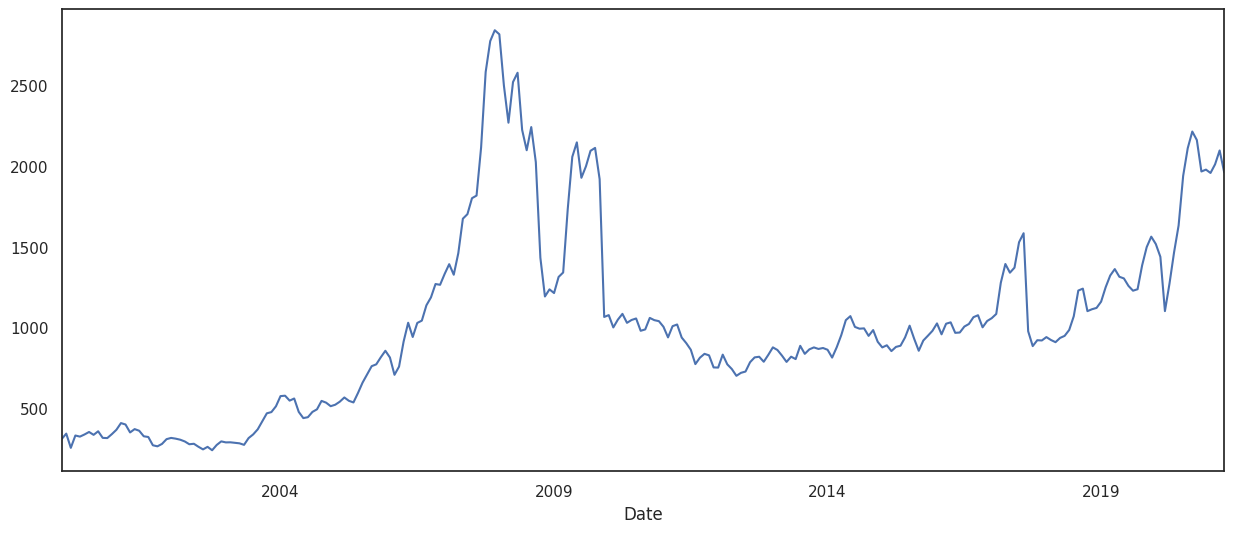

In [ ]:
y.plot(figsize = (15, 6))
plt.show()

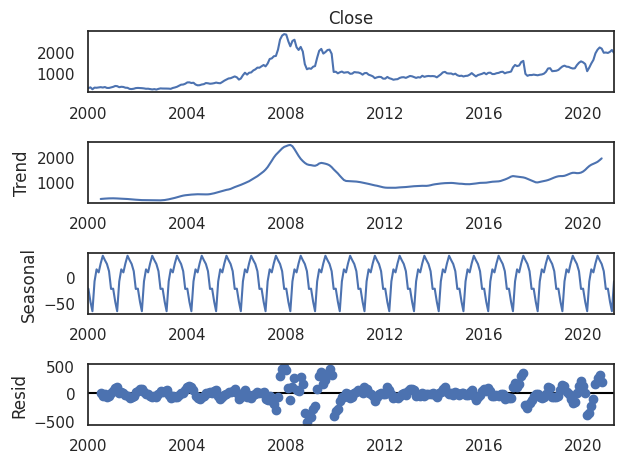

In [ ]:
decomposition = sm.tsa.seasonal_decompose(y, model = 'Multiplicative')
fig = decomposition.plot()
plt.show()

## **ARIMA model** (Autoregressive Integreted Moving Average)


In [ ]:
import itertools
p = q = range(0, 3)
d= range(0,1)
pdq = list(itertools.product(p, d, q))
model_pdq = [(x[0], x[1], x[2], 7) for x in list(itertools.product(p, d, q))]
print('Examples of parameter combinations for Model...')
print('Model: {}{}'.format(pdq[1], model_pdq[1]))
print('Model: {}{}'.format(pdq[1], model_pdq[2]))
print('Model: {}{}'.format(pdq[2], model_pdq[3]))
print('Model: {}{}'.format(pdq[2], model_pdq[4]))

Examples of parameter combinations for Model...
Model: (0, 0, 1)(0, 0, 1, 7)
Model: (0, 0, 1)(0, 0, 2, 7)
Model: (0, 0, 2)(1, 0, 0, 7)
Model: (0, 0, 2)(1, 0, 1, 7)


In [ ]:
ARIMA_AIC = pd.DataFrame(columns=['param', 'AIC'])
print(ARIMA_AIC)

Empty DataFrame
Columns: [param, AIC]
Index: []


In [ ]:
for param in pdq:
    ARIMA_model = ARIMA(y,order=param).fit()
    print('ARIMA{} - AIC:{}'.format(param,ARIMA_model.aic))
    ARIMA_AIC = ARIMA_AIC.append({'param':param, 'AIC': ARIMA_model.aic}, ignore_index=True)

ARIMA(0, 0, 0) - AIC:3976.1373062673174
ARIMA(0, 0, 1) - AIC:3668.740255257383
ARIMA(0, 0, 2) - AIC:3480.8507339672424
ARIMA(1, 0, 0) - AIC:3189.3671733591923
ARIMA(1, 0, 1) - AIC:3157.7977915666143
ARIMA(1, 0, 2) - AIC:3159.529782427524
ARIMA(2, 0, 0) - AIC:3164.6158133098597
ARIMA(2, 0, 1) - AIC:3159.5470872473547
ARIMA(2, 0, 2) - AIC:3161.5251914220144


In [ ]:
ARIMA_AIC.sort_values(by='AIC',ascending=True)

,param,AIC
4,"(1, 0, 1)",3157.797792
5,"(1, 0, 2)",3159.529782
7,"(2, 0, 1)",3159.547087
8,"(2, 0, 2)",3161.525191
6,"(2, 0, 0)",3164.615813
3,"(1, 0, 0)",3189.367173
2,"(0, 0, 2)",3480.850734
1,"(0, 0, 1)",3668.740255
0,"(0, 0, 0)",3976.137306


In [ ]:
model = ARIMA(y, order=(1,0,1))  
fitted = model.fit()  
print(fitted.summary())

                               SARIMAX Results                                
Dep. Variable:                  Close   No. Observations:                  256
Model:                 ARIMA(1, 0, 1)   Log Likelihood               -1574.899
Date:                Mon, 10 Apr 2023   AIC                           3157.798
Time:                        10:07:01   BIC                           3171.979
Sample:                    01-01-2000   HQIC                          3163.501
                         - 04-01-2021                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const       1013.0764    326.582      3.102      0.002     372.988    1653.165
ar.L1          0.9647      0.017     57.295      0.000       0.932       0.998
ma.L1          0.3971      0.036     11.183      0.0

In [ ]:
#AS Seasonality present in data we choose to use SARIMA

In [ ]:
SARIMA_AIC = pd.DataFrame(columns=['param','seasonal', 'AIC'])
print(SARIMA_AIC)

Empty DataFrame
Columns: [param, seasonal, AIC]
Index: []


In [ ]:
for param in pdq:
    for param_seasonal in model_pdq:
        SARIMA_model = sm.tsa.statespace.SARIMAX(y,
                                            order=param,
                                            seasonal_order=param_seasonal,
                                            enforce_stationarity=False,
                                            enforce_invertibility=False)
            
        results_SARIMA = SARIMA_model.fit()
        print('SARIMA{}x{}7 - AIC:{}'.format(param, param_seasonal, results_SARIMA.aic))
        SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
        

SARIMA(0, 0, 0)x(0, 0, 0, 7)7 - AIC:4325.505976243541
SARIMA(0, 0, 0)x(0, 0, 1, 7)7 - AIC:3994.869845504586
SARIMA(0, 0, 0)x(0, 0, 2, 7)7 - AIC:3798.5750953317656
SARIMA(0, 0, 0)x(1, 0, 0, 7)7 - AIC:3669.7272446400043
SARIMA(0, 0, 0)x(1, 0, 1, 7)7 - AIC:3647.2236128292107
SARIMA(0, 0, 0)x(1, 0, 2, 7)7 - AIC:3546.358965428134
SARIMA(0, 0, 0)x(2, 0, 0, 7)7 - AIC:3563.058812330917
SARIMA(0, 0, 0)x(2, 0, 1, 7)7 - AIC:3565.106554046505
SARIMA(0, 0, 0)x(2, 0, 2, 7)7 - AIC:3550.0341230046997
SARIMA(0, 0, 1)x(0, 0, 0, 7)7 - AIC:3981.3360354684714
SARIMA(0, 0, 1)x(0, 0, 1, 7)7 - AIC:3701.820539744137
SARIMA(0, 0, 1)x(0, 0, 2, 7)7 - AIC:3519.857702654886
SARIMA(0, 0, 1)x(1, 0, 0, 7)7 - AIC:3427.2442947487475
SARIMA(0, 0, 1)x(1, 0, 1, 7)7 - AIC:3384.2074616673203
SARIMA(0, 0, 1)x(1, 0, 2, 7)7 - AIC:3290.4004781567855
SARIMA(0, 0, 1)x(2, 0, 0, 7)7 - AIC:3317.6456111265175
SARIMA(0, 0, 1)x(2, 0, 1, 7)7 - AIC:3319.5539619532988
SARIMA(0, 0, 1)x(2, 0, 2, 7)7 - AIC:3292.3143306133925
SARIMA(0, 0, 2)x(

In [ ]:
SARIMA_AIC.sort_values(by=['AIC']).head()

,param,seasonal,AIC
47,"(1, 0, 2)","(0, 0, 2, 7)",2962.737088
74,"(2, 0, 2)","(0, 0, 2, 7)",2964.544912
50,"(1, 0, 2)","(1, 0, 2, 7)",2964.736821
77,"(2, 0, 2)","(1, 0, 2, 7)",2966.543925
53,"(1, 0, 2)","(2, 0, 2, 7)",2966.582074


In [ ]:
mod = sm.tsa.statespace.SARIMAX(y,
                                order=(1,0,2),
                                seasonal_order=(0, 0, 2, 7),
                                enforce_stationarity=False,
                                enforce_invertibility=False)
results_SARIMA = mod.fit()
print(results_SARIMA.summary())

                                     SARIMAX Results                                     
Dep. Variable:                             Close   No. Observations:                  256
Model:             SARIMAX(1, 0, 2)x(0, 0, 2, 7)   Log Likelihood               -1475.369
Date:                           Mon, 10 Apr 2023   AIC                           2962.737
Time:                                   10:07:35   BIC                           2983.596
Sample:                               01-01-2000   HQIC                          2971.143
                                    - 04-01-2021                                         
Covariance Type:                             opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.9971      0.007    148.356      0.000       0.984       1.010
ma.L1          0.3617      0.040      9.090

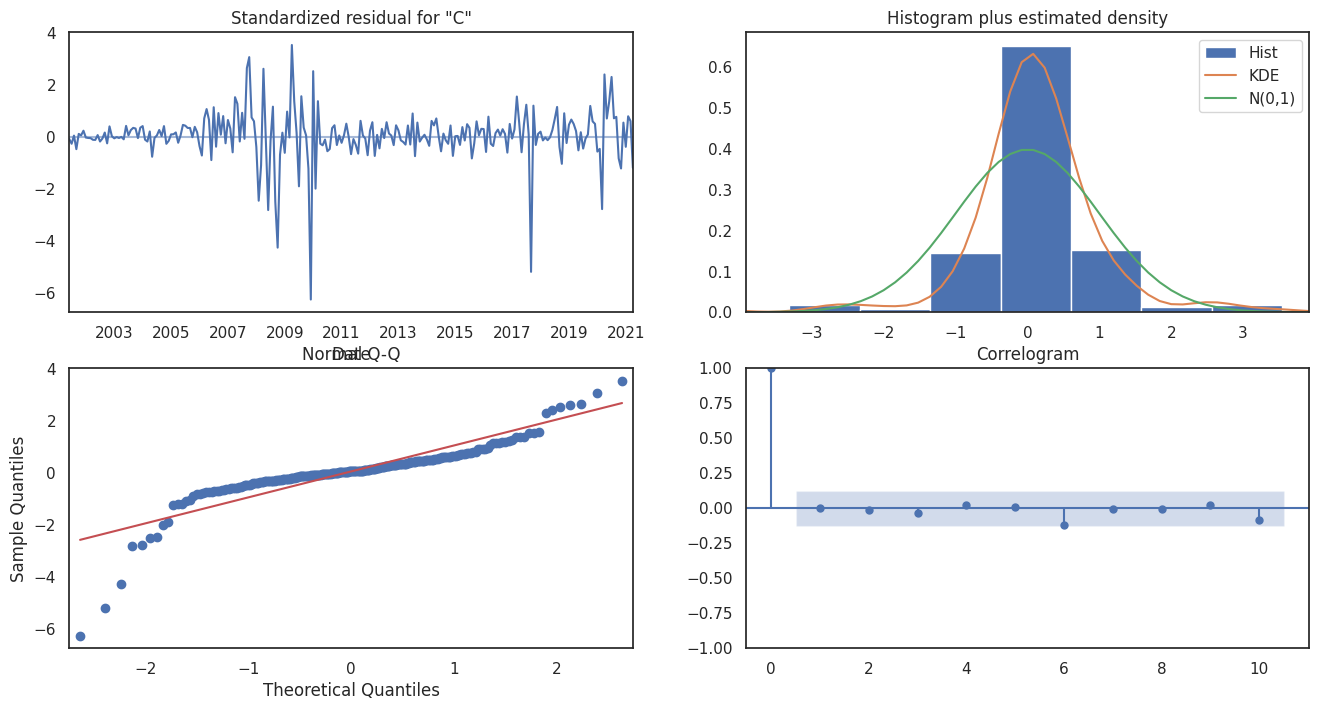

In [ ]:
results_SARIMA.plot_diagnostics(figsize=(16, 8))
plt.show()

In [ ]:
#It is not perfect, however, our model diagnostics suggests that the model residuals are near normally distributed.

# To help us understand the accuracy of our forecasts, we compare predicted sales to real sales of the time series, and we set forecasts to start at 2000–01–01 to the end of the data.

In [ ]:
prediction = results_SARIMA.get_prediction(start = pd.to_datetime('2000-01-01'), dynamic = False)
prediction_check = prediction.conf_int()
prediction_check

,lower Close,upper Close
Date,,
2000-01-01,-1959.963985,1959.963985
2000-02-01,-1665.444221,2280.767492
2000-03-01,-1633.566649,2316.025807
2000-04-01,-1722.057372,2227.598078
2000-05-01,-1644.957816,2304.697639
...,...,...
2020-12-01,1686.374270,2141.073735
2021-01-01,1773.745905,2228.445370
2021-02-01,1690.995598,2145.695063


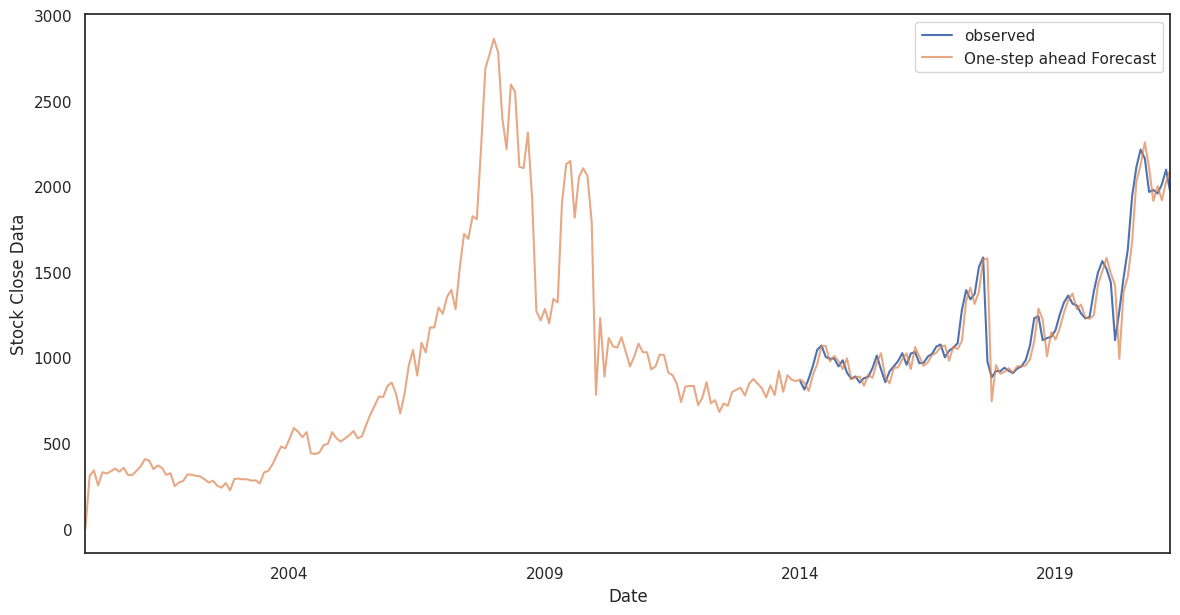

In [ ]:
ax = y['2014':].plot(label = 'observed')
prediction.predicted_mean.plot(ax = ax, label = 'One-step ahead Forecast', alpha = 0.7, figsize = (14, 7))
ax.set_xlabel("Date")
ax.set_ylabel('Stock Close Data')
plt.legend()
plt.show()

The line plot is showing the observed values compared to the rolling forecast predictions. Overall, our forecasts align with the true values very well, showing an upward trend starts from the beginning of the year and captured the seasonality after 2014.

In [ ]:
#ERROR ANALYSIS

In [ ]:
y_hat = prediction.predicted_mean
y_truth = y['2000-01-01':]
mse = ((y_hat - y_truth) ** 2).mean()
rmse = np.sqrt(mse)
print('The Mean Squared Error of our forecasts is {}'.format(round(mse, 2)))
print('The Root Mean Squared Error of our forecasts is {}'.format(round(rmse, 2)))

The Mean Squared Error of our forecasts is 13027.02
The Root Mean Squared Error of our forecasts is 114.14


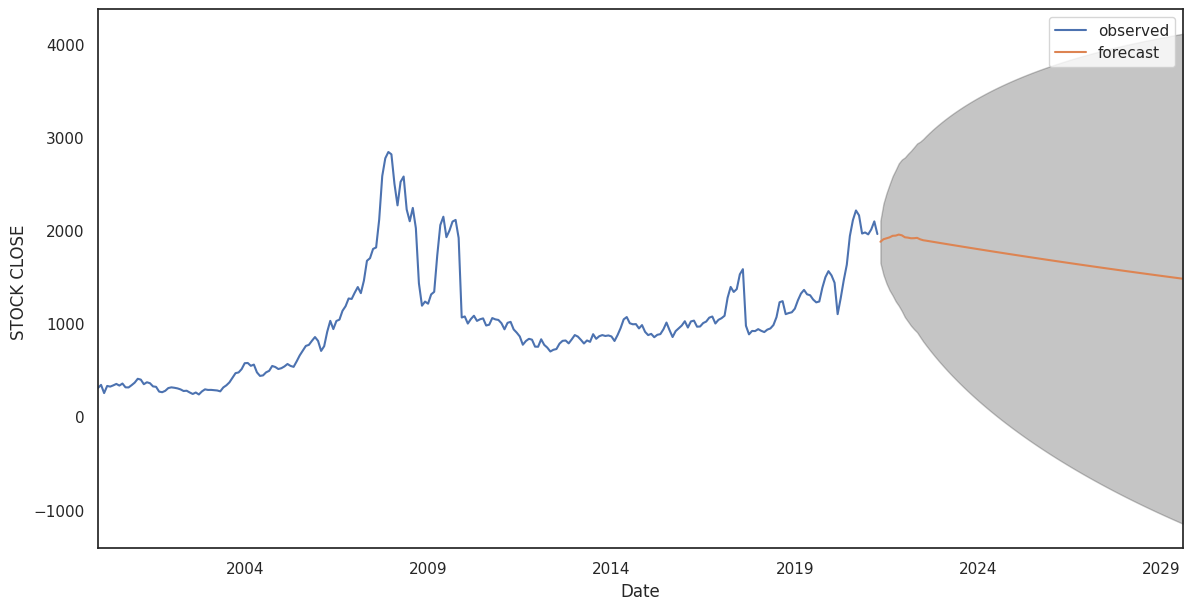

In [ ]:
pred_uc = results_SARIMA.get_forecast(steps = 100)
pred_ci = pred_uc.conf_int()

ax = y.plot(label = 'observed', figsize = (14, 7))
pred_uc.predicted_mean.plot(ax = ax, label = 'forecast')
ax.fill_between(pred_ci.index, pred_ci.iloc[:, 0], pred_ci.iloc[:, 1], color = 'k', alpha = 0.25)
ax.set_xlabel('Date')
ax.set_ylabel('STOCK CLOSE ')

plt.legend()
plt.show()


In [ ]:
resultsDf = pd.DataFrame({'Test RMSE':[np.sqrt(mean_squared_error(y_hat , y_truth))]},index=['ARIMA'] )
resultsDf

,Test RMSE
ARIMA,114.135958


Our model clearly captured STOCK seasonality.
As we forecast further out into the future, it is natural for us to become less confident in our values.
This is reflected by the confidence intervals generated by our model, which grow larger as we move further out into the future.
 

# **Forcasting** **using FBProphet**

In [ ]:
#!pip install numpy cython matplotlib pystan==2.19.1.1

In [ ]:
#!pip install fbprophet

In [ ]:
from fbprophet import Prophet

In [ ]:
data2 = data.copy()


In [ ]:
data = data.reset_index()
data

,Date,Close
0,2000-01-03,251.70
1,2000-01-04,271.85
2,2000-01-05,282.50
3,2000-01-06,294.35
4,2000-01-07,314.55
...,...,...
5301,2021-04-26,1937.85
5302,2021-04-27,1988.65
5303,2021-04-28,1997.30
5304,2021-04-29,2024.05


In [ ]:
df

,Date,Symbol,Series,Prev Close,Open,High,Low,Last,Close,VWAP,Volume,Turnover,Trades,Deliverable Volume,%Deliverble
0,2007-11-27,MUNDRAPORT,EQ,440.00,770.00,1050.00,770.00,959.00,962.90,984.72,27294366,2.687719e+15,NaN,9859619.0,0.3612
1,2007-11-28,MUNDRAPORT,EQ,962.90,984.00,990.00,874.00,885.00,893.90,941.38,4581338,4.312765e+14,NaN,1453278.0,0.3172
2,2007-11-29,MUNDRAPORT,EQ,893.90,909.00,914.75,841.00,887.00,884.20,888.09,5124121,4.550658e+14,NaN,1069678.0,0.2088
3,2007-11-30,MUNDRAPORT,EQ,884.20,890.00,958.00,890.00,929.00,921.55,929.17,4609762,4.283257e+14,NaN,1260913.0,0.2735
4,2007-12-03,MUNDRAPORT,EQ,921.55,939.75,995.00,922.00,980.00,969.30,965.65,2977470,2.875200e+14,NaN,816123.0,0.2741
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
235187,2021-04-26,ZEEL,EQ,188.00,190.60,191.10,185.10,186.70,186.40,187.35,8542755,1.600451e+14,52374.0,2340188.0,0.2739
235188,2021-04-27,ZEEL,EQ,186.40,188.00,192.95,186.80,188.80,188.15,189.41,14247767,2.698636e+14,73673.0,5425957.0,0.3808
235189,2021-04-28,ZEEL,EQ,188.15,188.80,190.60,187.10,188.95,189.10,188.85,8429439,1.591917e+14,44056.0,2413974.0,0.2864
235190,2021-04-29,ZEEL,EQ,189.10,190.80,191.65,186.00,186.60,186.55,187.44,9483009,1.777471e+14,60932.0,2744472.0,0.2894


In [ ]:
data[['ds','y']] = data[['Date','Close']]                       
data

,Date,Close,ds,y
0,2000-01-03,251.70,2000-01-03,251.70
1,2000-01-04,271.85,2000-01-04,271.85
2,2000-01-05,282.50,2000-01-05,282.50
3,2000-01-06,294.35,2000-01-06,294.35
4,2000-01-07,314.55,2000-01-07,314.55
...,...,...,...,...
5301,2021-04-26,1937.85,2021-04-26,1937.85
5302,2021-04-27,1988.65,2021-04-27,1988.65
5303,2021-04-28,1997.30,2021-04-28,1997.30
5304,2021-04-29,2024.05,2021-04-29,2024.05


In [ ]:
m = Prophet(daily_seasonality = True)
m.fit(data)

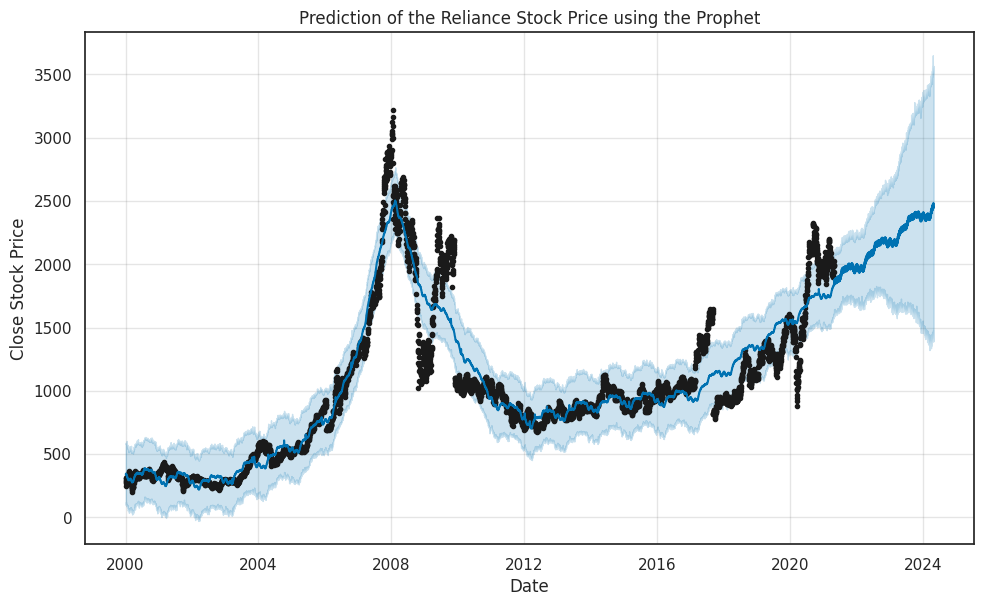

In [ ]:
future = m.make_future_dataframe(periods=1095) 
prediction = m.predict(future)
m.plot(prediction)
plt.title("Prediction of the Reliance Stock Price using the Prophet")
plt.xlabel("Date")
plt.ylabel("Close Stock Price")
plt.show()
from fbprophet.plot import plot_plotly, plot_components_plotly
plot_plotly(m,prediction)

It seems that the Reliance Stock price will be around 2219.58 in Apr 2023 based on the model’s prediction.

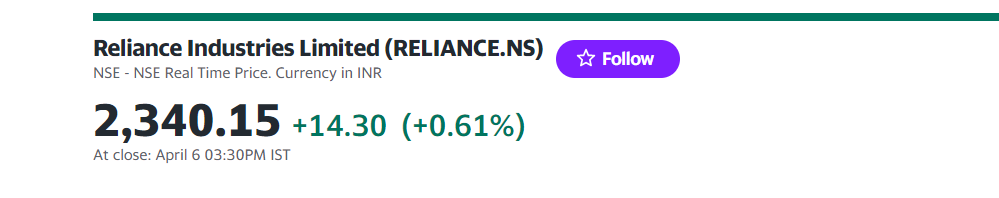

In [ ]:
prediction.tail()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,daily,...,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
6396,2024-04-25,2361.038451,1445.516482,3523.674893,1377.929597,3416.084408,86.817840,86.817840,86.817840,90.339481,...,-1.947223,-1.947223,-1.947223,-1.574419,-1.574419,-1.574419,0.0,0.0,0.0,2447.856291
6397,2024-04-26,2361.597923,1441.985201,3552.685524,1377.357659,3417.668075,84.404908,84.404908,84.404908,90.339481,...,-5.205744,-5.205744,-5.205744,-0.728829,-0.728829,-0.728829,0.0,0.0,0.0,2446.002831
6398,2024-04-27,2362.157394,1423.503607,3560.465989,1376.785721,3419.251742,121.612565,121.612565,121.612565,90.339481,...,31.173662,31.173662,31.173662,0.099422,0.099422,0.099422,0.0,0.0,0.0,2483.769959
6399,2024-04-28,2362.716865,1402.090643,3563.803412,1376.213783,3420.835409,81.012332,81.012332,81.012332,90.339481,...,-10.237506,-10.237506,-10.237506,0.910356,0.910356,0.910356,0.0,0.0,0.0,2443.729196
6400,2024-04-29,2363.276336,1392.128283,3542.232563,1375.641845,3422.419076,84.219069,84.219069,84.219069,90.339481,...,-7.822813,-7.822813,-7.822813,1.702401,1.702401,1.702401,0.0,0.0,0.0,2447.495405


In [ ]:
future = prediction[['ds', 'yhat', 'yhat_lower', 'yhat_upper']]
future

,ds,yhat,yhat_lower,yhat_upper
0,2000-01-03,339.770723,98.365931,587.454766
1,2000-01-04,343.493883,101.764443,578.396289
2,2000-01-05,345.764746,123.143135,589.916879
3,2000-01-06,345.251521,114.316846,593.514985
4,2000-01-07,341.430476,96.466504,590.987577
...,...,...,...,...
6396,2024-04-25,2447.856291,1445.516482,3523.674893
6397,2024-04-26,2446.002831,1441.985201,3552.685524
6398,2024-04-27,2483.769959,1423.503607,3560.465989
6399,2024-04-28,2443.729196,1402.090643,3563.803412


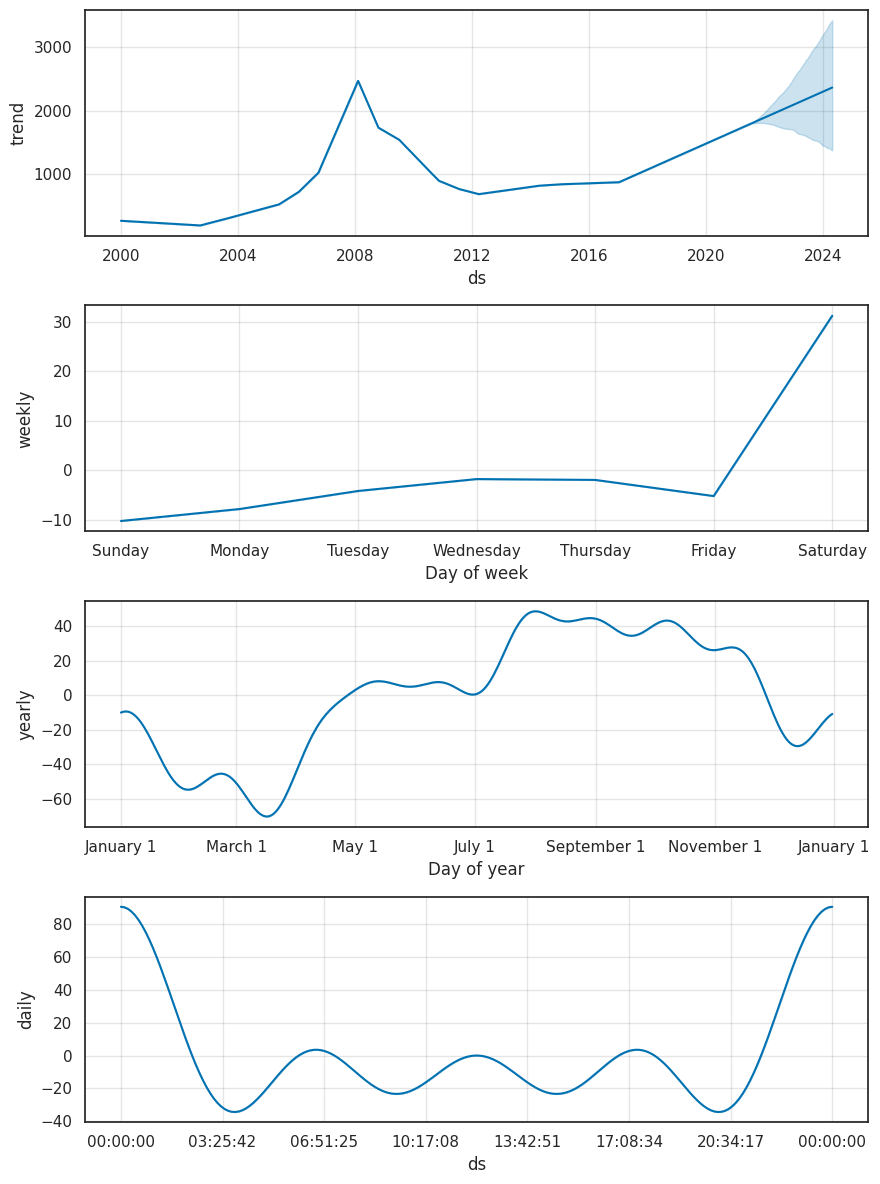

In [ ]:
m.plot_components(prediction)
plt.show()

The components of model including the trend and seasonality (identified in the yearly pane)


In [ ]:
from sklearn.metrics import r2_score,mean_squared_error,mean_absolute_error

In [ ]:
metric_df = future.set_index('ds')[['yhat']].join(data.set_index('ds').y).reset_index()

In [ ]:
metric_df.fillna(metric_df['y'].mean(),inplace=True)

In [ ]:
metric_df.isnull().sum()

ds      0
yhat    0
y       0
dtype: int64

In [ ]:
mse = mean_squared_error(metric_df.y, metric_df.yhat)
rmse = np.sqrt(mse)
print('The Mean Squared Error of our forecasts is {}'.format(round(mse, 2)))
print('The Root Mean Squared Error of our forecasts is {}'.format(round(rmse, 2)))

The Mean Squared Error of our forecasts is 255216.61
The Root Mean Squared Error of our forecasts is 505.19


In [ ]:
resultsDf_temp = pd.DataFrame({'Test RMSE': [np.sqrt(mean_squared_error(metric_df.y, metric_df.yhat))]}
                           ,index=['FBProphet'])

resultsDf = pd.concat([resultsDf, resultsDf_temp])
resultsDf

,Test RMSE
ARIMA,114.135958
FBProphet,505.189676


# **Exponential Smoothing** 



In [ ]:
train_size = int(len(data2) * 0.8)
train, test = data2[:train_size], data2[train_size:]


In [ ]:
data2.head()

,Close
Date,
2000-01-03,251.70
2000-01-04,271.85
2000-01-05,282.50
2000-01-06,294.35
2000-01-07,314.55


In [ ]:
y_hat_ex = test.copy()
fit2 = SimpleExpSmoothing(np.asarray(train['Close'])).fit(smoothing_level=0.6,optimized=False)
y_hat_ex['SES'] = fit2.forecast(len(test))

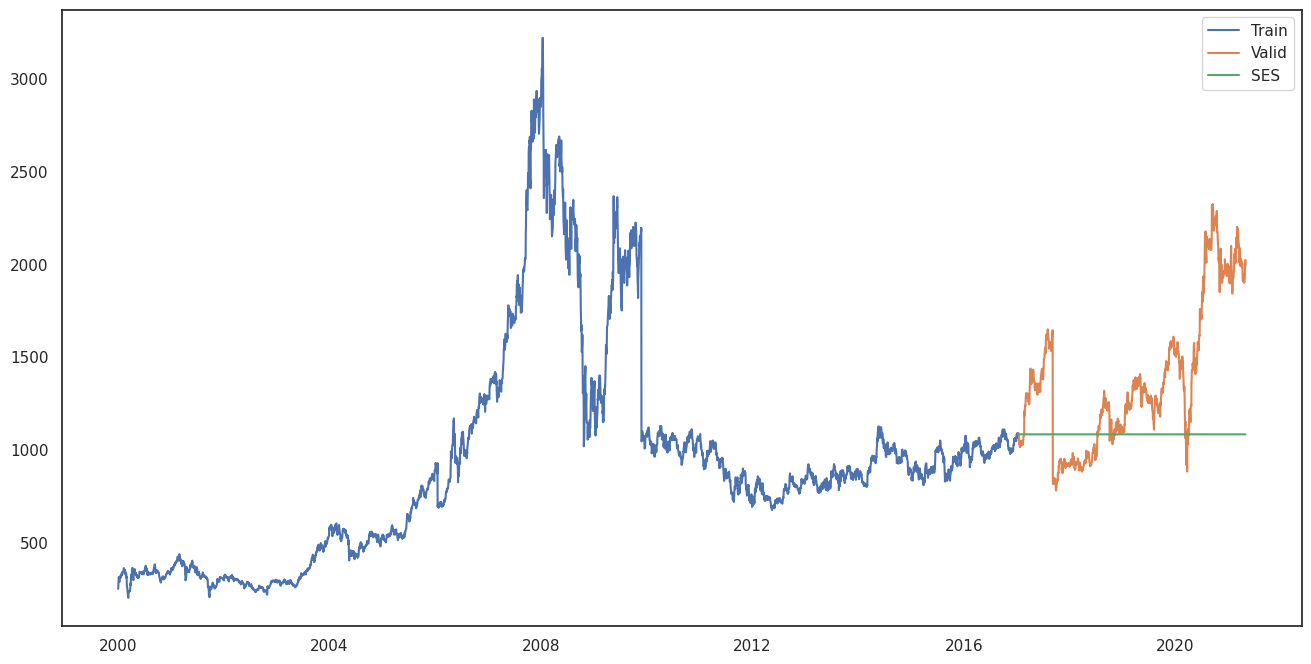

In [ ]:
plt.figure(figsize=(16,8))
plt.plot(train['Close'], label='Train')
plt.plot(test['Close'], label='Valid')
plt.plot(y_hat_ex['SES'], label='SES')
plt.legend(loc='best')
plt.show()

In [ ]:
rmse = np.sqrt(mean_squared_error(test['Close'], y_hat_ex['SES']))
print('RMSE:',rmse)

RMSE: 488.12235508808953


In [ ]:
resultsDf_temp = pd.DataFrame({'Test RMSE': [np.sqrt(mean_squared_error(test['Close'], y_hat_ex['SES']))]},index=['SES_Expo'])

resultsDf = pd.concat([resultsDf, resultsDf_temp])
resultsDf

,Test RMSE
ARIMA,114.135958
FBProphet,505.189676
SES_Expo,488.122355


In [ ]:
model_DES = Holt(np.asarray(train['Close'])).fit(smoothing_level = 0.3,smoothing_slope = 0.1)
y_hat_ex['DES'] = model_DES.forecast(len(test))


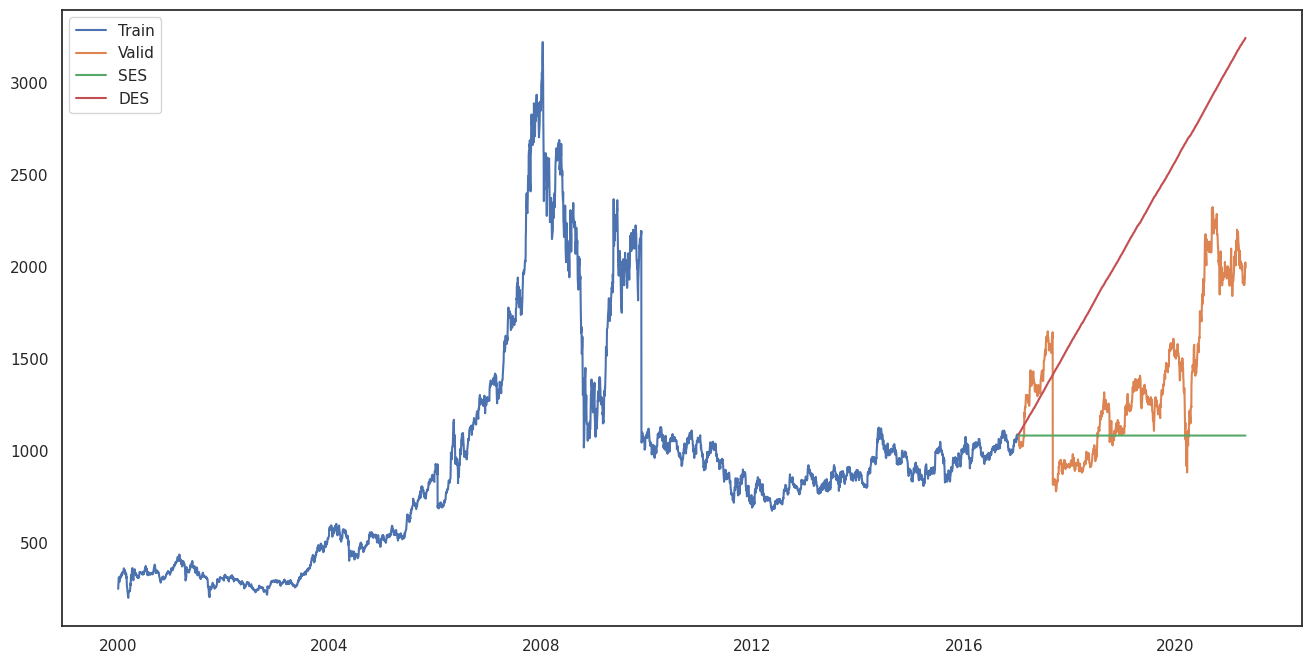

In [ ]:
plt.figure(figsize=(16,8))
plt.plot(train['Close'], label='Train')
plt.plot(test['Close'], label='Valid')
plt.plot(y_hat_ex['SES'], label='SES')
plt.plot(y_hat_ex['DES'], label='DES')
plt.legend(loc='best')
plt.show()

In [ ]:
rmse = np.sqrt(mean_squared_error(test['Close'], y_hat_ex.DES))
print('DES_RMSE:',rmse)

DES_RMSE: 896.6381548245965


In [ ]:
resultsDf_temp = pd.DataFrame({'Test RMSE': [np.sqrt(mean_squared_error(test['Close'], y_hat_ex.DES))]}
                           ,index=['DES_Expo'])

resultsDf = pd.concat([resultsDf, resultsDf_temp])
resultsDf

,Test RMSE
ARIMA,114.135958
FBProphet,505.189676
SES_Expo,488.122355
DES_Expo,896.638155


In [ ]:
Model_TES = ExponentialSmoothing(np.asarray(train['Close']) ,seasonal_periods=25 ,trend='add', seasonal='add',).fit()
y_hat_ex['TES'] = Model_TES.forecast(len(test))

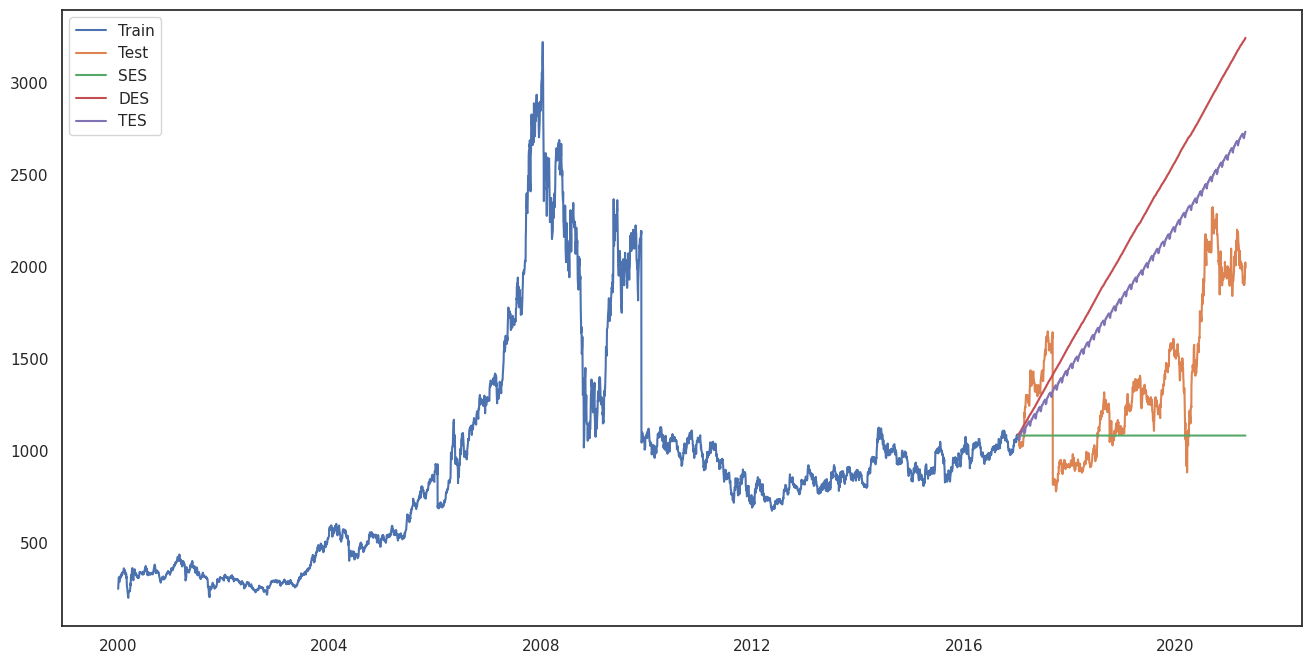

In [ ]:
plt.figure(figsize=(16,8))
plt.plot(train['Close'], label='Train')
plt.plot(test['Close'], label='Test')
plt.plot(y_hat_ex['SES'], label='SES')
plt.plot(y_hat_ex['DES'], label='DES')
plt.plot(y_hat_ex['TES'], label='TES')
plt.legend(loc='best')
plt.show()

In [ ]:
rmse = np.sqrt(mean_squared_error(test['Close'], y_hat_ex.TES))
print('RMSE_TES:',rmse)

RMSE_TES: 619.222707330203


In [ ]:
resultsDf_temp = pd.DataFrame({'Test RMSE': [np.sqrt(mean_squared_error(test['Close'], y_hat_ex.TES))]}
                           ,index=['TES_Expo'])

resultsDf = pd.concat([resultsDf, resultsDf_temp])
resultsDf

,Test RMSE
ARIMA,114.135958
FBProphet,505.189676
SES_Expo,488.122355
DES_Expo,896.638155
TES_Expo,619.222707


# **LSTM- long short-term memory networks**

In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0,1))
df1 = scaler.fit_transform(np.array(data2).reshape(-1,1))

In [ ]:
training_size = int(len(df1)*.7)
test_size = len(df1) - training_size
train_data, test_data = df1[0:training_size,:],df1[training_size:len(df1),:1]

In [ ]:
def create_dataset(dataset,time_step=1):
    dataX,dataY = [],[]
    for i in range(len(dataset)-time_step-1):
        a = dataset[i:(i+time_step),0]
        dataX.append(a)
        dataY.append(dataset[i+time_step,0])
    return np.array(dataX), np.array(dataY)

In [ ]:
time_step = 100
X_train,y_train = create_dataset(train_data,time_step)
X_test,y_test = create_dataset(test_data,time_step)

In [ ]:
print(X_train.shape), print(y_train.shape)

(3613, 100)
(3613,)


(None, None)

In [ ]:
## reshape input to be [samples,time steps, features] which is required for LSTM
X_train = X_train.reshape(X_train.shape[0],X_train.shape[1],1)
X_test = X_test.reshape(X_test.shape[0],X_test.shape[1],1)

In [ ]:
## Create the stacked LSTM MODEL
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM

In [ ]:
model = Sequential()
model.add(LSTM(50,return_sequences=True,input_shape=(100,1)))
model.add(LSTM(50,return_sequences=True))                      # Stacked LSTM model, i.e. one LSTM after other
model.add(LSTM(50))
model.add(Dense(1))                                            # Added final output
model.compile(loss='mean_squared_error',optimizer='adam')

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 100, 50)           10400     
                                                                 
 lstm_1 (LSTM)               (None, 100, 50)           20200     
                                                                 
 lstm_2 (LSTM)               (None, 50)                20200     
                                                                 
 dense (Dense)               (None, 1)                 51        
                                                                 
Total params: 50,851
Trainable params: 50,851
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model.fit(X_train,y_train,validation_data=(X_test,y_test),epochs=100,batch_size=64,verbose=1)

Epoch 1/100
57/57 [==============================] - 24s 283ms/step - loss: 0.0089 - val_loss: 9.1643e-04
Epoch 2/100
57/57 [==============================] - 14s 239ms/step - loss: 9.6233e-04 - val_loss: 8.7444e-04
Epoch 3/100
57/57 [==============================] - 14s 241ms/step - loss: 9.4595e-04 - val_loss: 0.0010
Epoch 4/100
57/57 [==============================] - 14s 238ms/step - loss: 7.8036e-04 - val_loss: 6.8950e-04
Epoch 5/100
57/57 [==============================] - 13s 237ms/step - loss: 7.8625e-04 - val_loss: 6.4547e-04
Epoch 6/100
57/57 [==============================] - 14s 240ms/step - loss: 6.8470e-04 - val_loss: 5.9977e-04
Epoch 7/100
57/57 [==============================] - 14s 238ms/step - loss: 6.5464e-04 - val_loss: 8.6142e-04
Epoch 8/100
57/57 [==============================] - 14s 239ms/step - loss: 6.1238e-04 - val_loss: 5.3940e-04
Epoch 9/100
57/57 [==============================] - 13s 237ms/step - loss: 6.8514e-04 - val_loss: 4.9763e-04
Epoch 10/100
57/57

In [ ]:
train_predict = model.predict(X_train)
test_predict = model.predict(X_test)

47/47 [==============================] - 2s 44ms/step


In [ ]:
## transformback to original form
train_predict = scaler.inverse_transform(train_predict)
test_predict = scaler.inverse_transform(test_predict)

In [ ]:
## Calculate the RMSE performance metrics
import math
from sklearn.metrics import mean_squared_error
math.sqrt(mean_squared_error(y_train,train_predict))

1102.419682259907

In [ ]:
# test data RMSE
math.sqrt(mean_squared_error(y_test,test_predict))

1310.5736828177

In [ ]:
resultsDf_temp = pd.DataFrame({'Test RMSE': [np.sqrt(mean_squared_error(y_test,test_predict))]}
                           ,index=['LSTM'])

resultsDf = pd.concat([resultsDf, resultsDf_temp])
resultsDf

,Test RMSE
ARIMA,114.135958
FBProphet,505.189676
SES_Expo,488.122355
DES_Expo,896.638155
TES_Expo,619.222707
LSTM,1310.573683


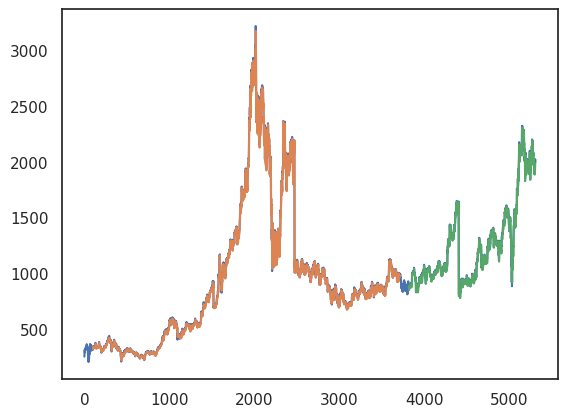

In [ ]:
# plotting
# shift train predictions for plotting
look_back = 100
trainPredictPlot = np.empty_like(df1)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(train_predict)+look_back,:] = train_predict
#shift test predictions for plotting
testPredictPlot = np.empty_like(df1)
testPredictPlot[:, :] = np.nan
testPredictPlot[len(train_predict)+(look_back*2)+1:len(df1)-1,:] = test_predict
# plot baseline and predictions
plt.plot(scaler.inverse_transform(df1))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)

plt.show()

# predicted ---> green line
# train data ---> orange line

In [ ]:
len(test_data)


1592

In [ ]:
x_input = test_data[1142:].reshape(1,-1)
x_input.shape

(1, 450)

In [ ]:
temp_input = list(x_input)
temp_input = temp_input[0].tolist()
temp_input

[0.3475717859924113,
 0.3568670985700793,
 0.3564528689543187,
 0.35734760492436163,
 0.35699965204712275,
 0.35554156379964535,
 0.36114194820472884,
 0.3574470200321442,
 0.35081934617997446,
 0.34656106572995543,
 0.35699965204712275,
 0.35469653538349377,
 0.3499080410253011,
 0.3407618511093069,
 0.33489635975013665,
 0.3339519162262025,
 0.3239938362633175,
 0.3191390651666031,
 0.32377843686312197,
 0.3251371100028167,
 0.31155037860586876,
 0.30656305403211104,
 0.3002999022418107,
 0.31453283183934516,
 0.3177638228422779,
 0.3550941958146239,
 0.3595678756648385,
 0.35617119281560156,
 0.3610093947276854,
 0.35549185624575413,
 0.3538349377827117,
 0.34581545242158634,
 0.35545871787649325,
 0.35245969545838646,
 0.35512733418388476,
 0.3512998525342568,
 0.3441585339585439,
 0.3464119430682816,
 0.3324441204248339,
 0.33070435603863935,
 0.32985932762248765,
 0.3377793978758305,
 0.337679982768048,
 0.34172286381787154,
 0.33375308601063736,
 0.3388066873229168,
 0.333885639

In [ ]:
lst_output = []
n_steps = 449
i = 0
while(i<30):
    if(len(temp_input)>100):
        #print(temp_input)
        x_input=np.array(temp_input[1:])
        print('{} day input {}'.format(i,x_input))
        x_input = x_input.reshape(1,-1)
        x_input = x_input.reshape((1,n_steps,1))
        #print(x_input)
        yhat = model.predict(x_input,verbose=0)
        print('{} day output {}'.format(i,yhat))
        temp_input.extend(yhat[0].tolist())
        temp_input = temp_input[1:]
        #print(temp_input)
        lst_output.extend(yhat.tolist())
        i = i+1
    else:
        x_input = x_input.reshape((1,n_steps,1))
        yhat = model.predict(x_input,verbose=0)
        print(yhat[0])
        temp_input.extend(yhat[0].tolist())
        print(len(temp_input))
        lst_output.extend(yhat.tolist())
        i=i+1
        
print(lst_output)

0 day input [0.3568671  0.35645287 0.3573476  0.35699965 0.35554156 0.36114195
 0.35744702 0.35081935 0.34656107 0.35699965 0.35469654 0.34990804
 0.34076185 0.33489636 0.33395192 0.32399384 0.31913907 0.32377844
 0.32513711 0.31155038 0.30656305 0.3002999  0.31453283 0.31776382
 0.3550942  0.35956788 0.35617119 0.36100939 0.35549186 0.35383494
 0.34581545 0.35545872 0.3524597  0.35512733 0.35129985 0.34415853
 0.34641194 0.33244412 0.33070436 0.32985933 0.3377794  0.33767998
 0.34172286 0.33375309 0.33880669 0.33388564 0.32947824 0.33221215
 0.32338078 0.34833397 0.34331351 0.35640316 0.35668484 0.36240121
 0.36646066 0.37414876 0.36508541 0.36712342 0.36614584 0.36680861
 0.37166338 0.38425596 0.38089242 0.38268189 0.3847199  0.38743724
 0.39544016 0.40201813 0.40128908 0.39408149 0.40867894 0.40693917
 0.40794989 0.41881928 0.42281245 0.41792454 0.41545574 0.41570427
 0.41227445 0.40816529 0.41601909 0.41167796 0.40581247 0.42055904
 0.41739433 0.42007854 0.41621792 0.43296936 0.445

In [ ]:
day_new = np.arange(1,101)
day_pred = np.arange(101,131)

In [ ]:
len(df1)

5306

In [ ]:
df3 = df1.tolist()
df3.extend(lst_output)

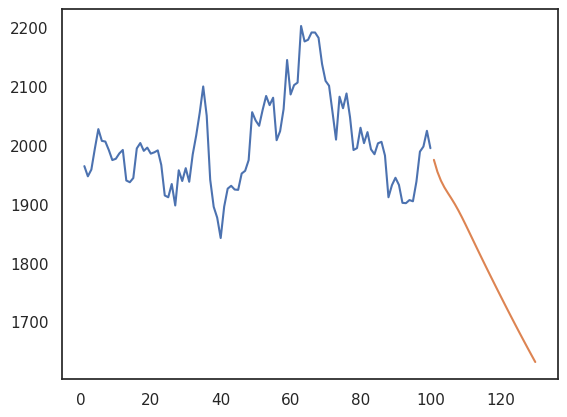

In [ ]:
plt.plot(day_new,scaler.inverse_transform(df1[5206:]))
plt.plot(day_pred,scaler.inverse_transform(lst_output))

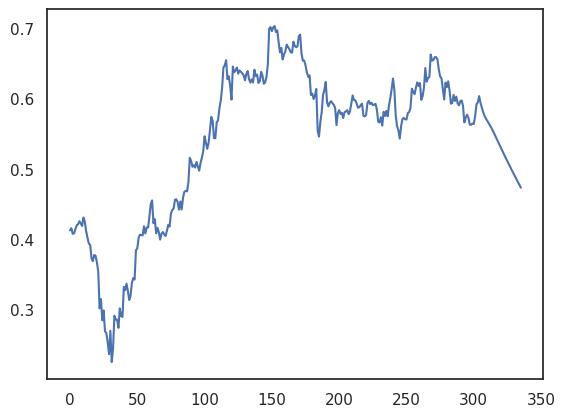

In [ ]:
df3=df1.tolist()
df3.extend(lst_output)
plt.plot(df3[5000:])

In [ ]:
resultsDf

,Test RMSE
ARIMA,114.135958
FBProphet,505.189676
SES_Expo,488.122355
DES_Expo,896.638155
TES_Expo,619.222707
LSTM,1310.573683


## Conclusion